In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Downloading the required NLTK data (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import nltk

# These downloads only need to happen once:
nltk.download('punkt')
nltk.download('punkt_tab')   # sometimes needed in certain NLTK versions
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')    # wordnet’s “Open Multilingual Wordnet” data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
# Loading the scraped dataset into Jupyter Again
df = pd.read_csv(r"C:\Users\USER\Documents\business_dayarticles.csv")
print("Data loaded. Number of articles:", len(df))
df.head()

Data loaded. Number of articles: 8157


,Titles,Authors,Dates,Links,Content
0,Airlines slash fares to Europe on low travels,eke-Korieocha,"Apr 11, 2025",https://businessday.ng/aviation/article/airlin...,…As global carriers cut forecasts\nAs the avia...
1,Cameroonian filmmakers tap Nollywood to revive...,nthony Udugba,"Apr 11, 2025",https://businessday.ng/life-arts/article/camer...,Cameroonian filmmakers are increasingly turnin...
2,MTN eyes second public offer in Nigeria after ...,tayo Jaiyeola,"Apr 10, 2025",https://businessday.ng/technology/article/mtn-...,MTN Group has announced plans to reduce its sh...
3,Relief for Nigerians as Dangote cuts petrol pr...,hinde Oladipo,"Apr 10, 2025",https://businessday.ng/news/article/relief-to-...,The Dangote Petroleum Refinery has informed ma...
4,Nigeria may miss 70% broadband penetration tar...,BusinessDay,"Apr 10, 2025",https://businessday.ng/technology/article/nige...,"With just months to the end of 2025, industry ..."


In [11]:
### Text Data Pre-Processing
## Define Pre-Processing Functions
def preprocess_text(text):
    # Removing punctuation and special characters using regex
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Converting to lowercase
    text = text.lower()
    
    # Tokenizing text
    tokens = word_tokenize(text)
    
    # Removing stop words (you may include additional words if needed)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
   
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstructing the string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Applying pre-processing to the content column to ensure nulls are handled
df['Processed_Content'] = df['Content'].fillna('').apply(preprocess_text)

# Previewing the preprocessed text
df[['Titles', 'Processed_Content']].head()

,Titles,Processed_Content
0,Airlines slash fares to Europe on low travels,global carrier cut forecast aviation industry ...
1,Cameroonian filmmakers tap Nollywood to revive...,cameroonian filmmaker increasingly turning nig...
2,MTN eyes second public offer in Nigeria after ...,mtn group announced plan reduce shareholding m...
3,Relief for Nigerians as Dangote cuts petrol pr...,dangote petroleum refinery informed marketer r...
4,Nigeria may miss 70% broadband penetration tar...,month end 2025 industry stakeholder expressed ...


In [13]:
### Sentiment Polarity Scoring
## Computing Sentiment Scores
def analyze_sentiment(text):
    """
    Use TextBlob to compute polarity and subjectivity.
    Polarity is a float within the range [-1.0, 1.0] where -1 is very negative and 1 is very positive.
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Applying sentiment analysis on the processed content
df['Polarity'] = df['Processed_Content'].apply(analyze_sentiment)

# Classifying sentiment into three categories: positive, neutral, negative
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Previewing the sentiment analysis results
df[['Titles', 'Polarity', 'Sentiment']].head()

,Titles,Polarity,Sentiment
0,Airlines slash fares to Europe on low travels,0.075130,Neutral
1,Cameroonian filmmakers tap Nollywood to revive...,0.051282,Neutral
2,MTN eyes second public offer in Nigeria after ...,-0.043114,Neutral
3,Relief for Nigerians as Dangote cuts petrol pr...,-0.156104,Negative
4,Nigeria may miss 70% broadband penetration tar...,0.045830,Neutral


In [8]:
### Visualization For Sentiment
## Barchart For Sentiment Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_19112\1517313645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


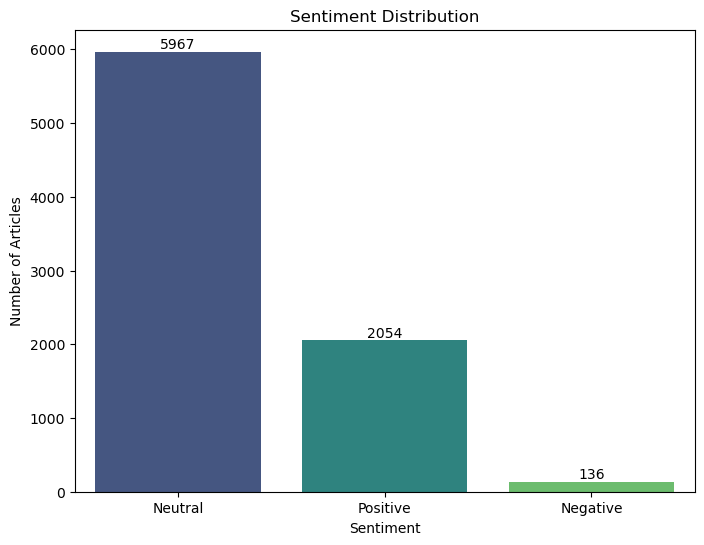

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette='viridis'
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",                    
        (p.get_x() + p.get_width() / 2, height),  
        ha='center',                         
        va='bottom'                          
    )

ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Articles')
plt.show()

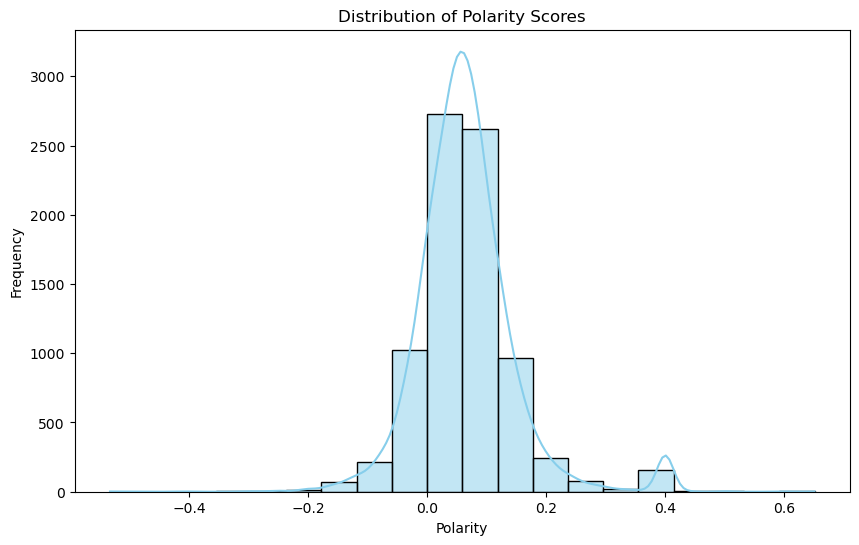

In [19]:
## Polarity Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

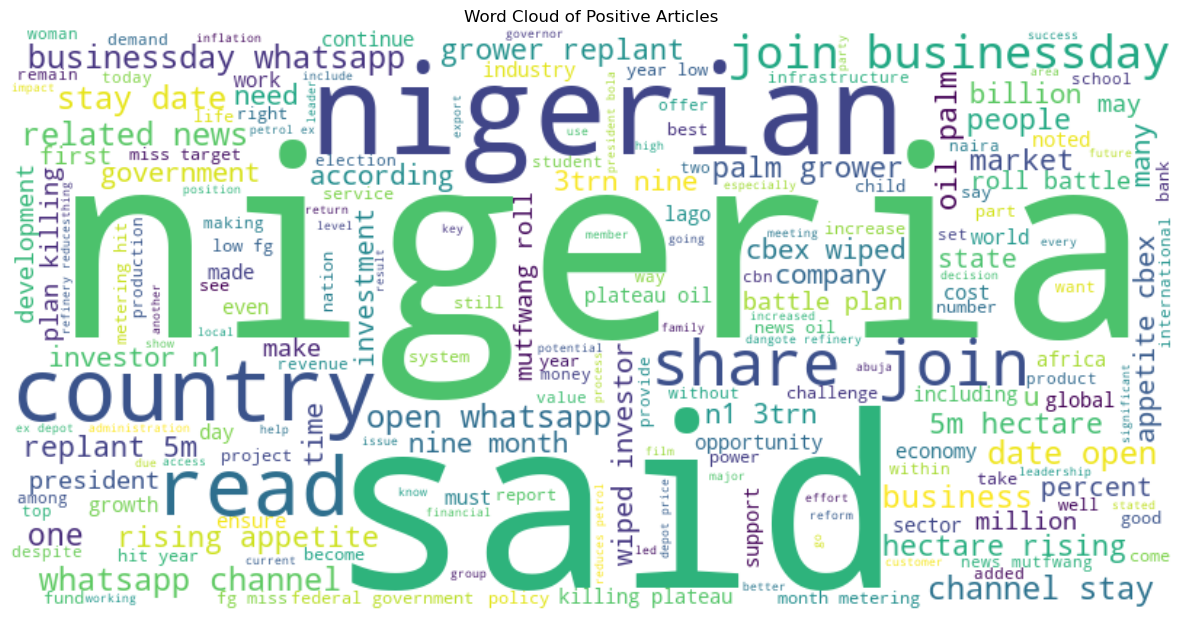

In [27]:
# Filtering for positive articles 
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Processed_Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Articles")
plt.show()

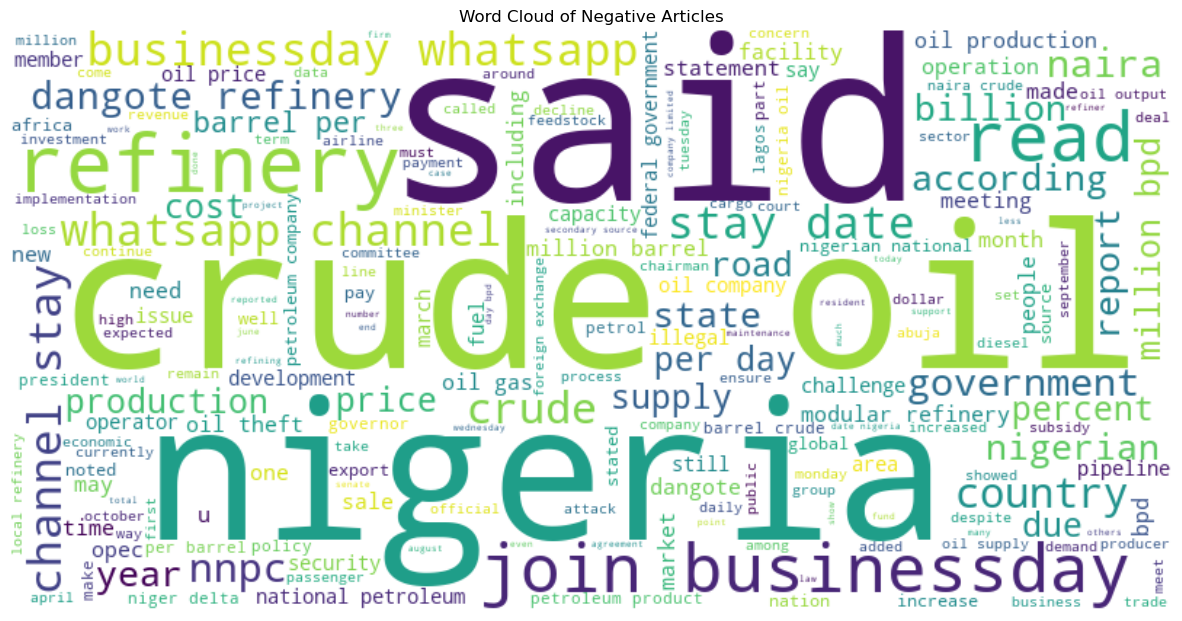

In [23]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Processed_Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Articles")
plt.show()

In [21]:
df.head()

,Titles,Authors,Dates,Links,Content,Processed_Content,Polarity,Sentiment
0,Airlines slash fares to Europe on low travels,eke-Korieocha,"Apr 11, 2025",https://businessday.ng/aviation/article/airlin...,…As global carriers cut forecasts\nAs the avia...,global carrier cut forecast aviation industry ...,0.075130,Neutral
1,Cameroonian filmmakers tap Nollywood to revive...,nthony Udugba,"Apr 11, 2025",https://businessday.ng/life-arts/article/camer...,Cameroonian filmmakers are increasingly turnin...,cameroonian filmmaker increasingly turning nig...,0.051282,Neutral
2,MTN eyes second public offer in Nigeria after ...,tayo Jaiyeola,"Apr 10, 2025",https://businessday.ng/technology/article/mtn-...,MTN Group has announced plans to reduce its sh...,mtn group announced plan reduce shareholding m...,-0.043114,Neutral
3,Relief for Nigerians as Dangote cuts petrol pr...,hinde Oladipo,"Apr 10, 2025",https://businessday.ng/news/article/relief-to-...,The Dangote Petroleum Refinery has informed ma...,dangote petroleum refinery informed marketer r...,-0.156104,Negative
4,Nigeria may miss 70% broadband penetration tar...,BusinessDay,"Apr 10, 2025",https://businessday.ng/technology/article/nige...,"With just months to the end of 2025, industry ...",month end 2025 industry stakeholder expressed ...,0.045830,Neutral


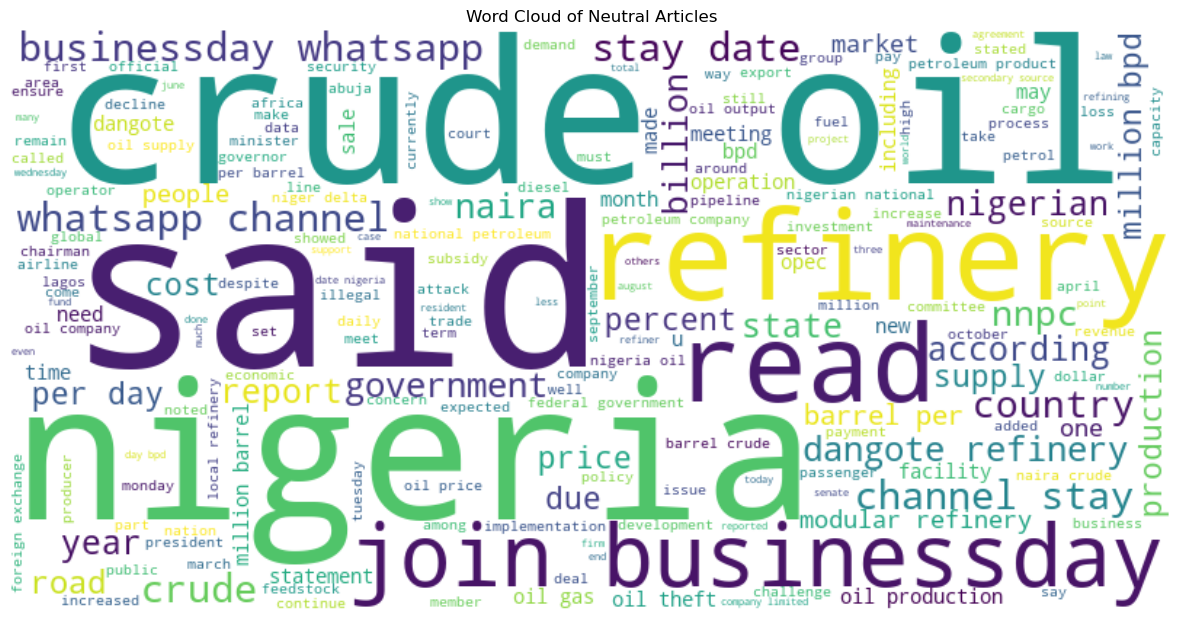

In [25]:
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Processed_Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Neutral Articles")
plt.show()

In [3]:
pip install wordcloud textblob nltk matplotlib seaborn

In [5]:
!pip install textblob nltk matplotlib seaborn